In [1]:
import chaospy as cp
import a_comparison as acn
import calculation_plot as calp
import sampling_method as sm
import numpy as np
import convergence_rate_f as crf
%matplotlib inline

In [2]:
%%time
k = [10, 19]
#k = dimension
N = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
#N = sample of size
leng = len(N)
R = 50
#replicated R times
NN = int(leng*R)
#define variations of the test function

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [3]:
%%time
kk_1 = k[0]
#choose dimension
a1 = sm.create_coefficient_a(kk_1, "A1-1")
#set up test case

CPU times: user 14 µs, sys: 1 µs, total: 15 µs
Wall time: 16.9 µs


In [4]:
%%time
#chaospy Sobol
rule1 = "S"
#chaospy Latin Hypercube
rule2 = "L"
#Random
rule3 = "R"

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 5.01 µs


In [5]:
%%time
er_si_N_1, er_sti_N_1 = calp.n_calculate(kk_1, N, a1, R, rule1)
#calculate estimated S_i and S_ti for rule1

CPU times: user 14min 13s, sys: 9.43 s, total: 14min 22s
Wall time: 14min 21s


In [6]:
%%time
er_si_N_2, er_sti_N_2 = calp.n_calculate(kk_1, N, a1, R, rule2)
#calculate estimated S_i and S_ti for rule2

CPU times: user 8min 9s, sys: 6.89 s, total: 8min 16s
Wall time: 8min 13s


In [7]:
%%time
er_si_N_3, er_sti_N_3 = calp.n_calculate(kk_1, N, a1, R, rule3)
#calculate estimated S_i and S_ti for rule3

CPU times: user 8min 11s, sys: 7.13 s, total: 8min 19s
Wall time: 8min 15s


In [8]:
%%time
er_si_max_1 = er_si_N_1[(NN-R):NN, :]
er_sti_max_1 = er_sti_N_1[(NN-R):NN, :]
#get the S_i and S_ti of rule1 for max N 

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 10 µs


In [9]:
%%time
er_si_max_2 = er_si_N_2[(NN-R):NN, :]
er_sti_max_2 = er_sti_N_2[(NN-R):NN, :]
#get the S_i and S_ti of rule2 for max N 

CPU times: user 10 µs, sys: 6 µs, total: 16 µs
Wall time: 16.9 µs


In [10]:
%%time
er_si_max_3 = er_si_N_3[(NN-R):NN, :]
er_sti_max_3 = er_sti_N_3[(NN-R):NN, :]
#get the S_i and S_ti of rule3 for max N 

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 9.06 µs


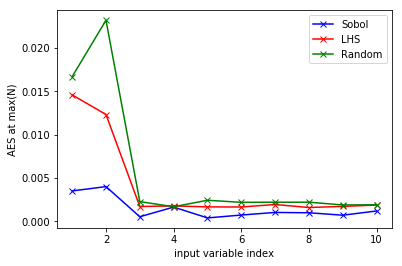

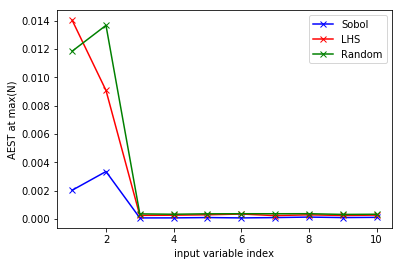

CPU times: user 324 ms, sys: 12.1 ms, total: 337 ms
Wall time: 334 ms


In [11]:
%%time
calp.draw_aes_plot(kk_1, a1, R, er_si_max_1, er_si_max_2
                   , er_si_max_3, er_sti_max_1
                   , er_sti_max_2, er_sti_max_3)
#draw i-wise errors AES and AEST at max N

In [12]:
%%time
aes_1_N, aest_1_N = calp.aes_aest_N(N, kk_1, R, a1
                                    , er_si_N_1, er_sti_N_1)
maes_1, maest_1 = calp.maes_maest_N(N, kk_1, aes_1_N, aest_1_N)
#calculate convergence MAES and MAEST for rule1

CPU times: user 6.22 ms, sys: 2.32 ms, total: 8.54 ms
Wall time: 6.57 ms


In [13]:
%%time
aes_2_N, aest_2_N = calp.aes_aest_N(N, kk_1, R, a1
                                    , er_si_N_2, er_sti_N_2)
maes_2, maest_2 = calp.maes_maest_N(N, kk_1, aes_2_N, aest_2_N)
#calculate convergence MAES and MAEST for rule2

CPU times: user 6.4 ms, sys: 3.14 ms, total: 9.55 ms
Wall time: 7.16 ms


In [14]:
%%time
aes_3_N, aest_3_N = calp.aes_aest_N(N, kk_1, R, a1
                                    , er_si_N_3, er_sti_N_3)
maes_3, maest_3 = calp.maes_maest_N(N, kk_1, aes_3_N, aest_3_N)
#calculate convergence MAES and MAEST for rule3

CPU times: user 6.06 ms, sys: 2.7 ms, total: 8.76 ms
Wall time: 6.8 ms


In [15]:
%%time
name_z_1 = ["Sobol MAES", "LHS MAES"
          , "Random MAES", "Sobol MAEST"
          , "LHS MAEST", "Random MAEST"]
z_1 = crf.convergence_rate(N, maes_1, name_z_1[0])
z_2 = crf.convergence_rate(N, maes_2, name_z_1[1])
z_3 = crf.convergence_rate(N, maes_3, name_z_1[2])
z_t_1 = crf.convergence_rate(N, maest_1, name_z_1[3])
z_t_2 = crf.convergence_rate(N, maest_2, name_z_1[4])
z_t_3 = crf.convergence_rate(N, maest_3, name_z_1[5])

Sobol MAES convergence rate =  1.06119412341
-------------------------------------
LHS MAES convergence rate =  0.553989017506
-------------------------------------
Random MAES convergence rate =  0.650274870668
-------------------------------------
Sobol MAEST convergence rate =  1.09900744263
-------------------------------------
LHS MAEST convergence rate =  0.5484233327
-------------------------------------
Random MAEST convergence rate =  0.65077400956
-------------------------------------
CPU times: user 3.72 ms, sys: 2.31 ms, total: 6.03 ms
Wall time: 4.28 ms


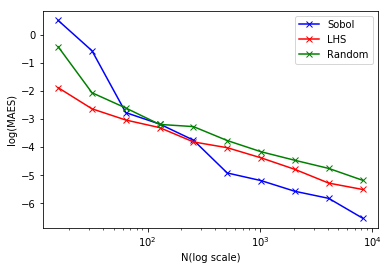

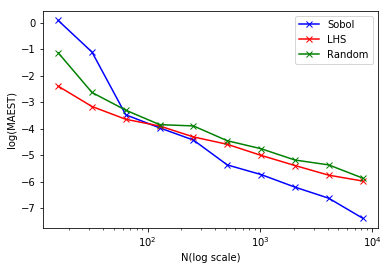

CPU times: user 804 ms, sys: 27.6 ms, total: 831 ms
Wall time: 831 ms


In [16]:
%%time
calp.draw_maes_plot(N, maes_1, maes_2, maes_3
                    , maest_1, maest_2, maest_3)
#draw convergence log(MAES) and log(MAEST)

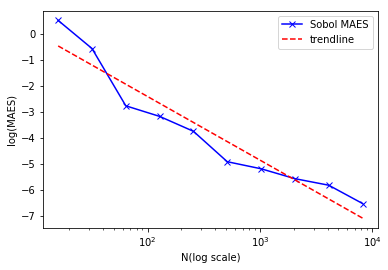

CPU times: user 364 ms, sys: 8.97 ms, total: 373 ms
Wall time: 372 ms


In [17]:
%%time
#double check trend line
crf.check_trend_line(z_1, N, maes_1, name_z_1[0])

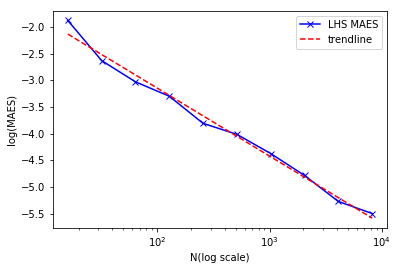

CPU times: user 314 ms, sys: 4.12 ms, total: 318 ms
Wall time: 317 ms


In [18]:
%%time
crf.check_trend_line(z_2, N, maes_2, name_z_1[1])

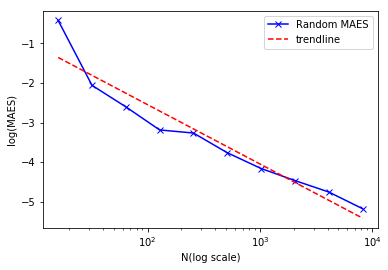

CPU times: user 291 ms, sys: 4.61 ms, total: 296 ms
Wall time: 294 ms


In [19]:
%%time
crf.check_trend_line(z_3, N, maes_3, name_z_1[2])

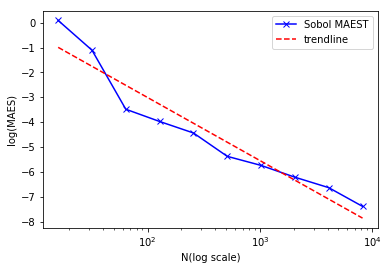

CPU times: user 314 ms, sys: 5.19 ms, total: 319 ms
Wall time: 318 ms


In [20]:
%%time
crf.check_trend_line(z_t_1, N, maest_1, name_z_1[3])

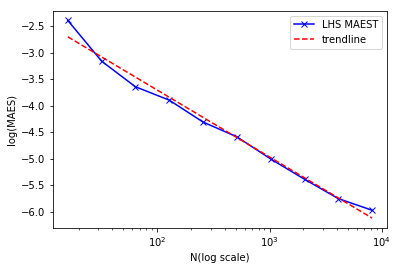

CPU times: user 321 ms, sys: 8.71 ms, total: 330 ms
Wall time: 328 ms


In [21]:
%%time
crf.check_trend_line(z_t_2, N, maest_2, name_z_1[4])

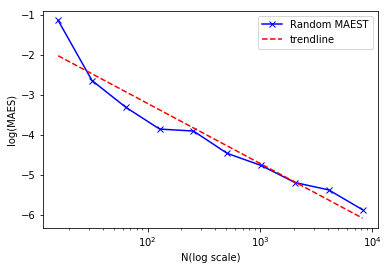

CPU times: user 321 ms, sys: 7.39 ms, total: 328 ms
Wall time: 329 ms


In [22]:
%%time
crf.check_trend_line(z_t_3, N, maest_3, name_z_1[5])

In [23]:
%%time
#start another k, repeat above steps
kk_2 = k[1]
#choose dimension
a2 = sm.create_coefficient_a(kk_2, "A1-1")
#set up test case

CPU times: user 16 µs, sys: 3 µs, total: 19 µs
Wall time: 19.8 µs


In [24]:
%%time
er_si_N_1_2, er_sti_N_1_2 = calp.n_calculate(kk_2, N, a2, R, rule1)
#calculate estimated S_i and S_ti for rule1

CPU times: user 1h 9min 20s, sys: 46.3 s, total: 1h 10min 6s
Wall time: 1h 9min 45s


In [25]:
%%time
er_si_N_2_2, er_sti_N_2_2 = calp.n_calculate(kk_2, N, a2, R, rule2)
#calculate estimated S_i and S_ti for rule2

CPU times: user 25min 45s, sys: 45.4 s, total: 26min 30s
Wall time: 25min 57s


In [26]:
%%time
er_si_N_3_2, er_sti_N_3_2 = calp.n_calculate(kk_2, N, a2, R, rule3)
#calculate estimated S_i and S_ti for rule3

CPU times: user 25min 1s, sys: 48 s, total: 25min 49s
Wall time: 25min 14s


In [27]:
%%time
er_si_max_1_2 = er_si_N_1_2[(NN-R):NN, :]
er_sti_max_1_2 = er_sti_N_1_2[(NN-R):NN, :]
#get the S_i and S_ti of rule1 for max N 

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 9.06 µs


In [28]:
%%time
er_si_max_2_2 = er_si_N_2_2[(NN-R):NN, :]
er_sti_max_2_2 = er_sti_N_2_2[(NN-R):NN, :]
#get the S_i and S_ti of rule2 for max N 

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 10 µs


In [29]:
%%time
er_si_max_3_2 = er_si_N_3_2[(NN-R):NN, :]
er_sti_max_3_2 = er_sti_N_3_2[(NN-R):NN, :]
#get the S_i and S_ti of rule3 for max N 

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 10 µs


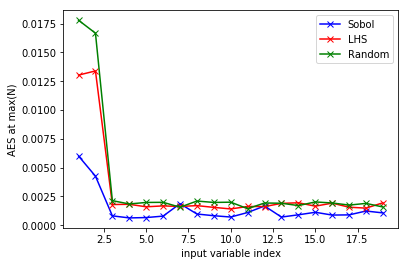

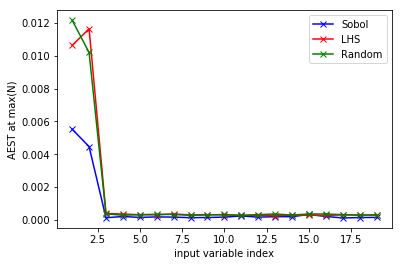

CPU times: user 309 ms, sys: 14.1 ms, total: 323 ms
Wall time: 318 ms


In [30]:
%%time
calp.draw_aes_plot(kk_2, a2, R, er_si_max_1_2, er_si_max_2_2
                   , er_si_max_3_2, er_sti_max_1_2
                   , er_sti_max_2_2, er_sti_max_3_2)
#draw i-wise errors AES and AEST at max N

In [31]:
%%time
aes_1_N_2, aest_1_N_2 = calp.aes_aest_N(N, kk_2, R, a2
                                        , er_si_N_1_2, er_sti_N_1_2)
maes_1_2, maest_1_2 = calp.maes_maest_N(N, kk_2, aes_1_N_2, aest_1_N_2)
#calculate convergence MAES and MAEST for rule1

CPU times: user 12.1 ms, sys: 6.26 ms, total: 18.4 ms
Wall time: 13.6 ms


In [32]:
%%time
aes_2_N_2, aest_2_N_2 = calp.aes_aest_N(N, kk_2, R, a2
                                        , er_si_N_2_2, er_sti_N_2_2)
maes_2_2, maest_2_2 = calp.maes_maest_N(N, kk_2, aes_2_N_2, aest_2_N_2)
#calculate convergence MAES and MAEST for rule2

CPU times: user 13.6 ms, sys: 5.96 ms, total: 19.5 ms
Wall time: 14.8 ms


In [33]:
%%time
aes_3_N_2, aest_3_N_2 = calp.aes_aest_N(N, kk_2, R, a2
                                        , er_si_N_3_2, er_sti_N_3_2)
maes_3_2, maest_3_2 = calp.maes_maest_N(N, kk_2, aes_3_N_2, aest_3_N_2)
#calculate convergence MAES and MAEST for rule3

CPU times: user 13.7 ms, sys: 6.34 ms, total: 20 ms
Wall time: 14.9 ms


In [34]:
%%time
#k = 19
z_1_2 = crf.convergence_rate(N, maes_1_2, name_z_1[0])
z_2_2 = crf.convergence_rate(N, maes_2_2, name_z_1[1])
z_3_2 = crf.convergence_rate(N, maes_3_2, name_z_1[2])
z_t_1_2 = crf.convergence_rate(N, maest_1_2, name_z_1[3])
z_t_2_2 = crf.convergence_rate(N, maest_2_2, name_z_1[4])
z_t_3_2 = crf.convergence_rate(N, maest_3_2, name_z_1[5])

Sobol MAES convergence rate =  0.717968600236
-------------------------------------
LHS MAES convergence rate =  0.52954103823
-------------------------------------
Random MAES convergence rate =  0.660868162157
-------------------------------------
Sobol MAEST convergence rate =  0.687924170842
-------------------------------------
LHS MAEST convergence rate =  0.509327489588
-------------------------------------
Random MAEST convergence rate =  0.662446576039
-------------------------------------
CPU times: user 4.39 ms, sys: 2.56 ms, total: 6.95 ms
Wall time: 4.98 ms


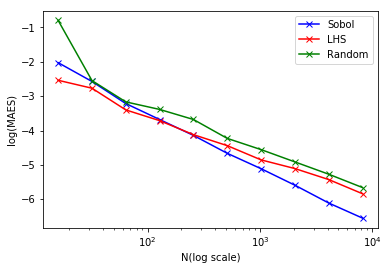

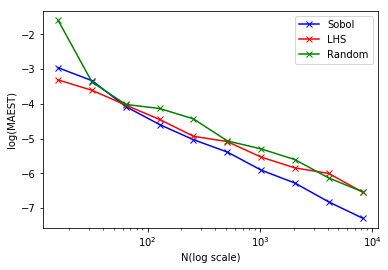

CPU times: user 588 ms, sys: 10.2 ms, total: 598 ms
Wall time: 594 ms


In [35]:
%%time
calp.draw_maes_plot(N, maes_1_2, maes_2_2, maes_3_2
                    , maest_1_2, maest_2_2, maest_3_2)
#draw convergence log(MAES) and log(MAEST)

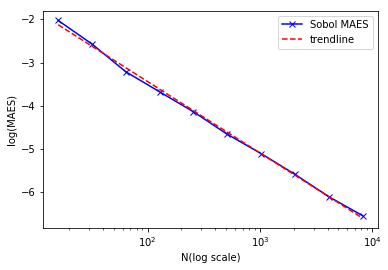

CPU times: user 285 ms, sys: 4.95 ms, total: 290 ms
Wall time: 288 ms


In [36]:
%%time
#double check trend line
crf.check_trend_line(z_1_2, N, maes_1_2, name_z_1[0])

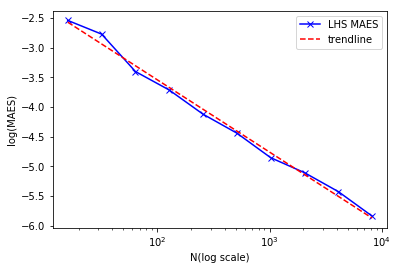

CPU times: user 298 ms, sys: 5.66 ms, total: 304 ms
Wall time: 303 ms


In [37]:
%%time
crf.check_trend_line(z_2_2, N, maes_2_2, name_z_1[1])

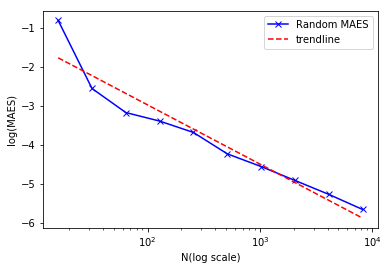

CPU times: user 328 ms, sys: 10.2 ms, total: 338 ms
Wall time: 336 ms


In [38]:
%%time
crf.check_trend_line(z_3_2, N, maes_3_2, name_z_1[2])

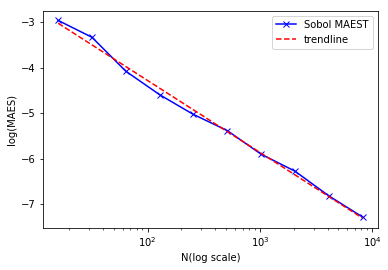

CPU times: user 281 ms, sys: 4.36 ms, total: 286 ms
Wall time: 284 ms


In [39]:
%%time
crf.check_trend_line(z_t_1_2, N, maest_1_2, name_z_1[3])

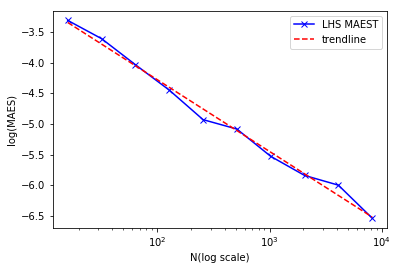

CPU times: user 293 ms, sys: 3.86 ms, total: 297 ms
Wall time: 295 ms


In [40]:
%%time
crf.check_trend_line(z_t_2_2, N, maest_2_2, name_z_1[4])

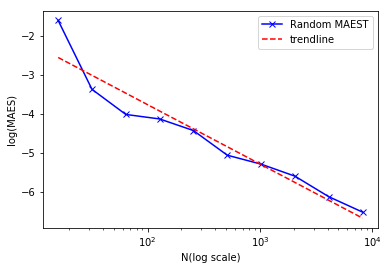

CPU times: user 286 ms, sys: 3.91 ms, total: 290 ms
Wall time: 288 ms


In [41]:
%%time
crf.check_trend_line(z_t_3_2, N, maest_3_2, name_z_1[5])

In [77]:
import comparison_abs_maes as cam

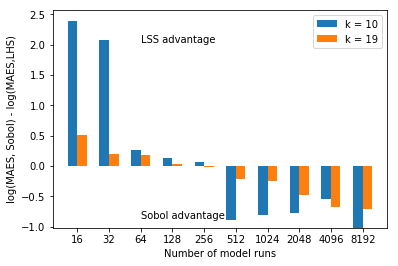

In [78]:
#Sobol and LHS
d_1 = maes_1 - maes_2
d_2 = maes_1_2 - maes_2_2
cam.draw_comparison_abs_maes(N, d_1, d_2, 'Sobol', 'LHS')

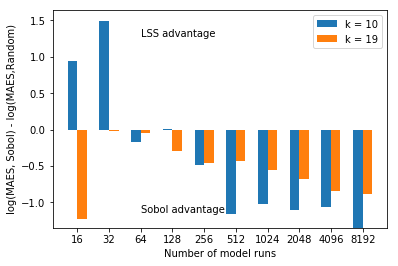

In [79]:
#Sobol and Random
d_3 = maes_1 - maes_3
d_4 = maes_1_2 - maes_3_2
cam.draw_comparison_abs_maes(N, d_3, d_4, 'Sobol', 'Random')

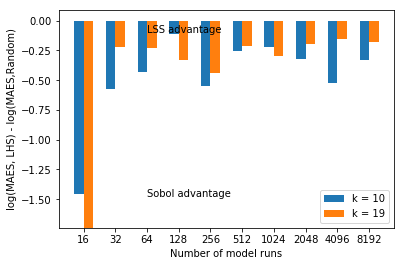

In [80]:
#LHS and Random
d_5 = maes_2 - maes_3
d_6 = maes_2_2 - maes_3_2
cam.draw_comparison_abs_maes(N, d_5, d_6, 'LHS', 'Random')